In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)

In [20]:

df = pd.read_csv('classroom_actions.csv')
df.head()

,timestamp,id,group,total_days,completed
0,2015-08-10 17:06:01.032740,610019,experiment,97,True
1,2015-08-10 17:15:28.950975,690224,control,75,False
2,2015-08-10 17:34:40.920384,564994,experiment,128,True
3,2015-08-10 17:50:39.847374,849588,experiment,66,False
4,2015-08-10 19:10:40.650599,849826,experiment,34,False


In [21]:
# The total_days represents the total amount of time
# each student has spent in classroom.
# get the average classroom time for control group
control_mean = df.query('group == "control"').total_days.mean()

# get the average classroom time for experiment group
experiment_mean = df.query('group == "experiment"').total_days.mean()

# display average classroom time for each group
control_mean, experiment_mean

(73.36899038461539, 74.6715935334873)

In [22]:
# compute observed difference in classroom time
obs_diff = experiment_mean - control_mean

# display observed difference
obs_diff

1.3026031488719099

In [23]:
# create sampling distribution of difference in average classroom times
# with boostrapping
diffs = []
size = df.shape[0]
for _ in range(10000):
    df_sample = df.sample(size,replace=True)
    sample_control = df_sample.query('group == "control"').total_days.mean()
    sample_experiment = df_sample.query('group == "experiment"').total_days.mean()
    diffs.append(sample_experiment - sample_control)

In [24]:
# convert to numpy array
diffs = np.array(diffs)

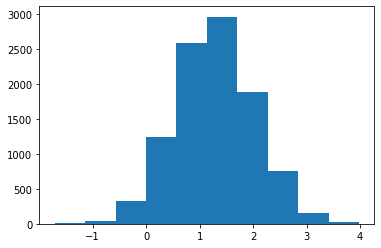

In [25]:
# plot sampling distribution
_=plt.hist(diffs)

(array([4.000e+01, 2.840e+02, 1.180e+03, 2.490e+03, 3.020e+03, 2.047e+03,
        7.780e+02, 1.430e+02, 1.700e+01, 1.000e+00]),
 array([-2.47976526, -1.90628735, -1.33280944, -0.75933154, -0.18585363,
         0.38762428,  0.96110218,  1.53458009,  2.108058  ,  2.6815359 ,
         3.25501381]),
 <a list of 10 Patch objects>)

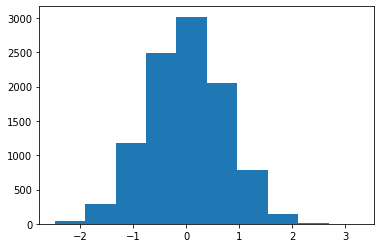

In [26]:
# simulate distribution under the null hypothesis
null_vals = np.random.normal(0,diffs.std(),diffs.size)
plt.hist(null_vals)

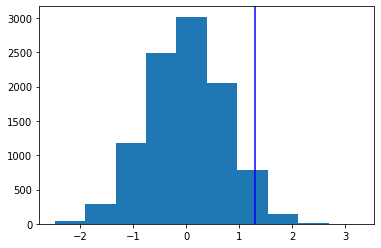

In [27]:
# plot null distribution
plt.hist(null_vals)

# plot line for observed statistic
plt.axvline(obs_diff,color='blue')

In [ ]:
# compute p value
p_value = (null_vals > obs_diff).mean()
p_value

With p_value < alpha_value(0.05),null hypothesis can be rejected and result is statistically significant